# Ecommerce Profit Analysis

## 1. Introduction

This report aims to identify where the profit comes from in an e-commerce dataset and how customer and product behaviors contribute to overall profitability. The insights will support strategic decisions such as which segments to promote, optimize, or restructure.

#### Dataset Description:
This dataset contains one year of customer purchase transactions from an American e-commerce platform.

#### Source:
https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset



## 2. Data Acquisition

- Load the dataset
- Preview structure and basic metadata
- Import necessary libraries

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("E-commerce Dataset.csv")
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [55]:
df.shape

(51290, 16)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51282 non-null  datetime64[ns]
 1   Time                 51282 non-null  object        
 2   Aging                51282 non-null  float64       
 3   Customer_Id          51282 non-null  int64         
 4   Gender               51282 non-null  object        
 5   Device_Type          51282 non-null  object        
 6   Customer_Login_type  51282 non-null  object        
 7   Product_Category     51282 non-null  object        
 8   Product              51282 non-null  object        
 9   Sales                51282 non-null  float64       
 10  Quantity             51282 non-null  float64       
 11  Discount             51282 non-null  float64       
 12  Profit               51282 non-null  float64       
 13  Shipping_Cost        51282 non-null 

## 3. Data Cleaning

- Convert data types (e.g., date, numeric fields)
- Handle missing or invalid values
- Basic profiling of fields

In [71]:
df.nunique()

Order_Date               356
Time                   35273
Aging                     11
Customer_Id            38990
Gender                     2
Device_Type                2
Customer_Login_type        4
Product_Category           4
Product                   42
Sales                     39
Quantity                   5
Discount                   5
Profit                   391
Shipping_Cost            153
Order_Priority             4
Payment_method             5
dtype: int64

In [158]:
# Check missing values
print(df.isnull().sum())


Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64


In [160]:
# Drop rows with missing critical fields 
df.dropna(inplace=True)

# Convert numeric fields
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [164]:
df.shape

(51282, 18)

In [166]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [168]:
df.shape

(51282, 18)

## 4. Exploratory Data Analysis (EDA)

- Visualize distributions of key numeric fields (Profit, Sales, Discount, etc.)
- Identify outliers and patterns
- Prepare data for deeper analysis

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aging,51289.0,5.255035,2.959948,1.0,3.00,5.0,8.00,10.5
Customer_Id,51290.0,58155.758764,26032.215826,10000.0,35831.25,61018.0,80736.25,99999.0
Sales,51289.0,152.340872,66.495419,33.0,85.00,133.0,218.00,250.0
Quantity,51288.0,2.502983,1.511859,1.0,1.00,2.0,4.00,5.0
Discount,51289.0,0.303821,0.131027,0.1,0.20,0.3,0.40,0.5
Profit,51290.0,70.407226,48.729488,0.5,24.90,59.9,118.40,167.5
Shipping_Cost,51289.0,7.041557,4.871745,0.1,2.50,6.0,11.80,16.8


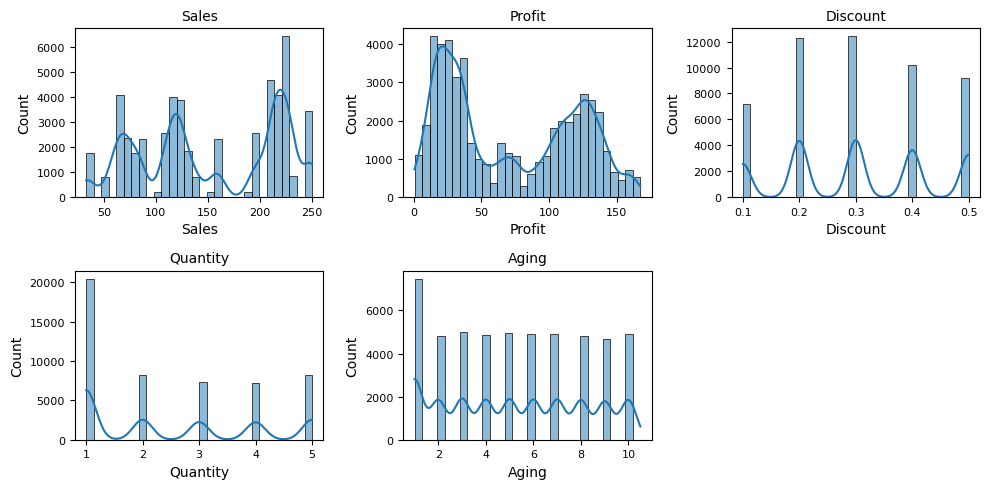

In [170]:
# Detect outliers
numeric_fields = ['Sales', 'Profit', 'Discount', 'Quantity', 'Aging']

fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # 2 rows, 3 columns
axes = axes.flatten()

for i, col in enumerate(numeric_fields):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].tick_params(axis='both', labelsize=8)

# Hide the empty plot (if fields < 6)
for j in range(len(numeric_fields), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [162]:
# Create New Features
df['Profit_Rate'] = df['Profit'] / df['Sales']
df['Month'] = df['Order_Date'].dt.to_period('M')

### 4.1 Bimodal Profit Distribution: Category-wise Decomposition
The overall profit distribution appears bimodal, suggesting that the data may consist of two distinct groups of orders — low-profit and high-profit.

To understand the source of this pattern, I decompose the profit distribution by Product_Category using overlaid KDE plots.

<Axes: xlabel='Profit', ylabel='Density'>

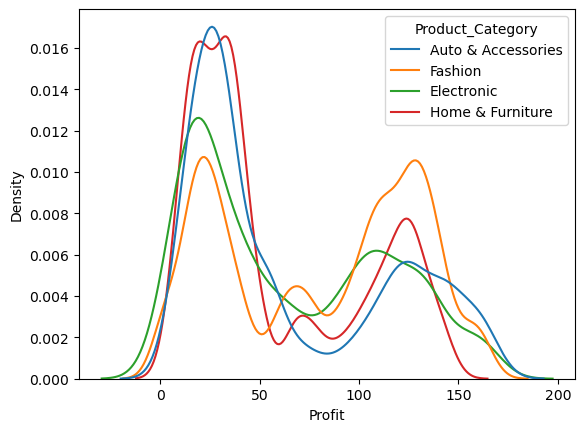

In [283]:
# Plot profit distribution for each product category separately
# This helps identify which product categories contribute to the observed bimodal shape
sns.kdeplot(data=df, x='Profit', hue='Product_Category', common_norm=False)


### 4.2 Profit Level Distribution by Product Category

To further understand the bimodal profit distribution, I grouped orders by `Profit_Level` (Low, Mid, High) and `Product_Category`.


In [110]:
# Create Profit_Level category
df['Profit_Level'] = pd.cut(df['Profit'], bins=[-np.inf, 50, 100, np.inf], labels=['Low', 'Mid', 'High'])

# Count how many orders fall into each category by Product_Category
profit_level_by_category = df.groupby(['Profit_Level', 'Product_Category']).size().unstack(fill_value=0)
profit_level_by_category


/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/3787307158.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_level_by_category = df.groupby(['Profit_Level', 'Product_Category']).size().unstack(fill_value=0)


Product_Category,Auto & Accessories,Electronic,Fashion,Home & Furniture
Profit_Level,,,,
Low,4186,1386,9114,9724
Mid,1011,478,4539,1698
High,2308,837,11993,4016


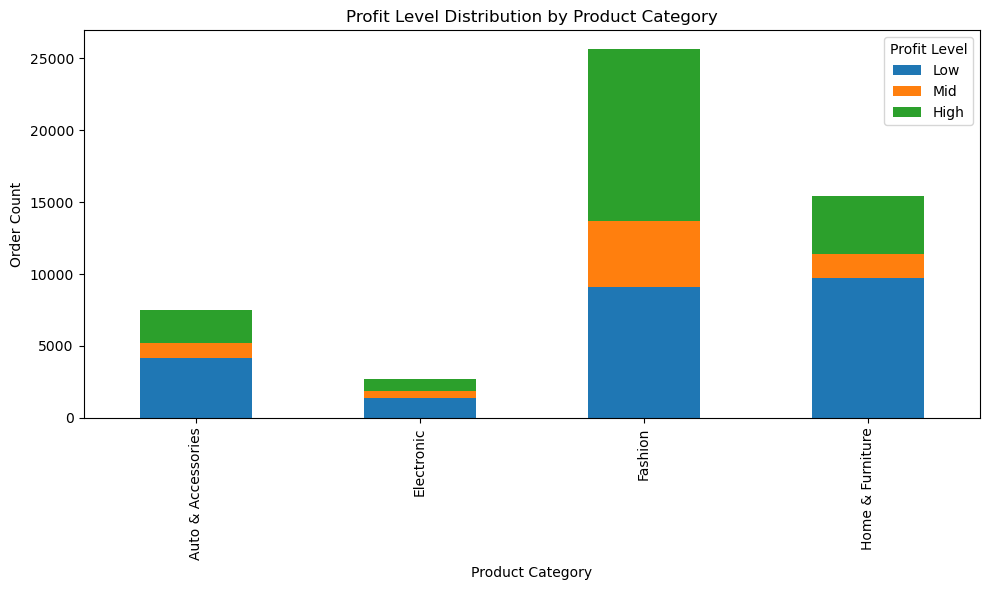

In [112]:
# Plot stacked bar chart for Profit_Level by Product_Category
ax = profit_level_by_category.T.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title("Profit Level Distribution by Product Category")
ax.set_xlabel("Product Category")
ax.set_ylabel("Order Count")
ax.legend(title="Profit Level")
plt.tight_layout()

### 4.3 Profit Structure by Product Category

This structured analysis complements the unit price decomposition by quantifying the composition of orders within each product category.  
It strengthens the conclusion that the bimodal distribution is influenced by product-level profitability patterns.


In [125]:
# Calculate unit price per item
# This helps us see if high-profit orders are linked to high-priced products
df['Unit_Price'] = df['Sales'] / df['Quantity']

In [127]:
# Create two groups based on Profit thresholds that reflect the two KDE peaks
# Low profit group (e.g., Profit < 50) and high profit group (e.g., Profit > 100)
low_profit_orders = df[df['Profit'] < 50]
high_profit_orders = df[df['Profit'] > 100]

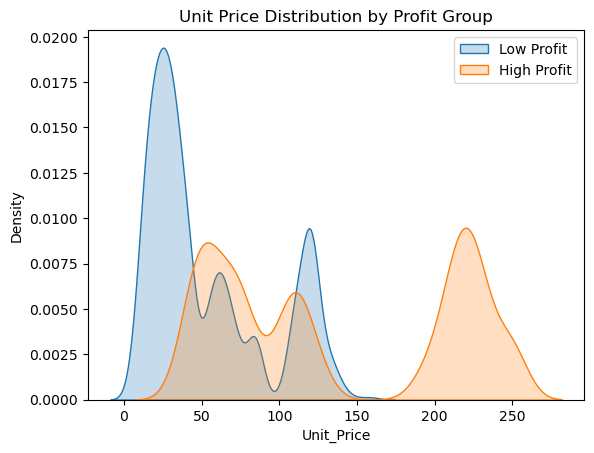

In [129]:
# Plot unit price distribution for both groups
# This KDE plot helps visually compare the price characteristics of both groups
sns.kdeplot(data=low_profit_orders, x='Unit_Price', label='Low Profit', fill=True)
sns.kdeplot(data=high_profit_orders, x='Unit_Price', label='High Profit', fill=True)
plt.title("Unit Price Distribution by Profit Group")
plt.xlabel("Unit Price")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
# Print average unit price for each group
# This quantifies the observation from the KDE plots
print("Low Profit Orders - Avg Unit Price:", round(low_profit_orders['Unit_Price'].mean(), 2))
print("High Profit Orders - Avg Unit Price:", round(high_profit_orders['Unit_Price'].mean(), 2))

Low Profit Orders - Unit Price Mean: 53.91779739713493
High Profit Orders - Unit Price Mean: 137.10530639238414


## 5. Profit Analysis



### 5.1 By Product
- Total profit by product category and product
- Profit vs. Profit Rate
- Quadrant analysis: Stars, Volume Drivers, Niche, Low Value

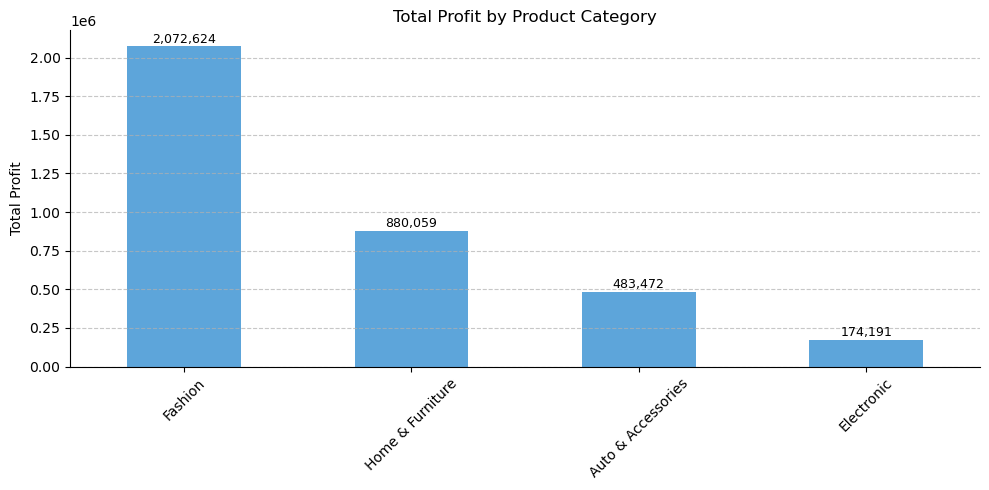

In [301]:

# Group total profit by Product_Category
category_profit = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)

# Plot as vertical bar chart
plt.figure(figsize=(10, 5))
ax = category_profit.plot(kind='bar', color='#5DA5DA')

# Set title and axis labels
ax.set_title('Total Profit by Product Category')
ax.set_ylabel('Total Profit')
ax.set_xlabel('')

# Remove unnecessary spines for clean design
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(category_profit.values):
    ax.text(i, v + 5000, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

# Optional grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


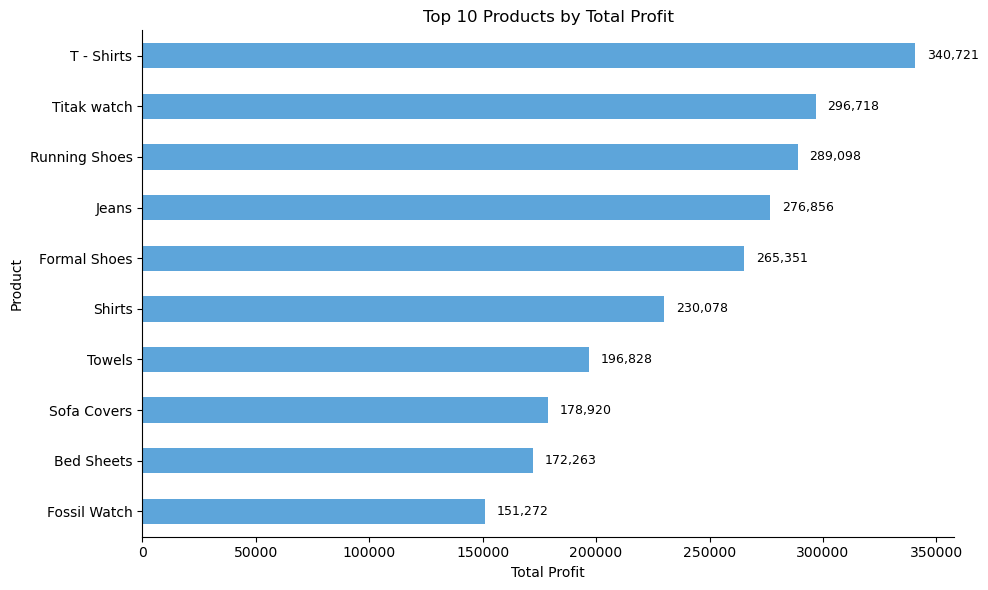

In [303]:


# Group total profit by Product and select top 10
product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
ax = product_profit.plot(kind='barh', color='#5DA5DA')

# Set title and labels
ax.set_title('Top 10 Products by Total Profit')
ax.set_xlabel('Total Profit')
ax.set_ylabel('Product')

# Clean chart style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to the right end of bars
for i, v in enumerate(product_profit.values):
    ax.text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=9)

# Invert y-axis to show highest on top
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()


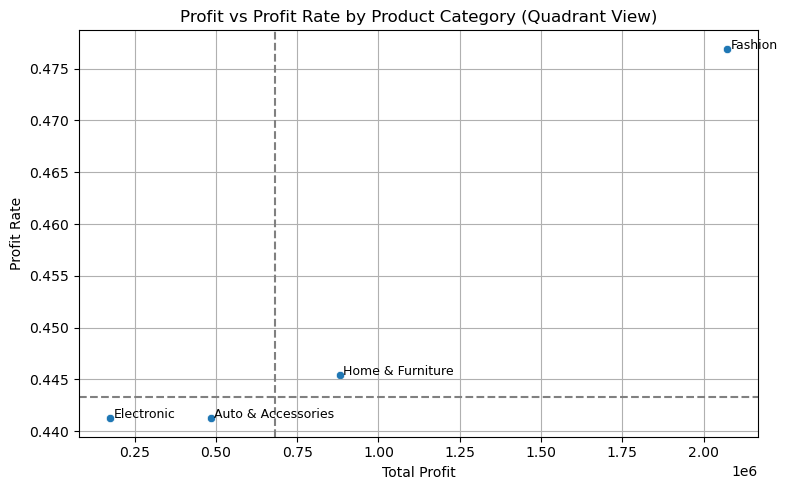

In [205]:

# Group by product category to calculate total profit and profit rate
summary = df.groupby('Product_Category').agg({
    'Profit': 'sum',
    'Sales': 'sum'
})
summary['Profit_Rate'] = summary['Profit'] / summary['Sales']

# Calculate medians for quadrant reference lines
median_profit = summary['Profit'].median()
median_rate = summary['Profit_Rate'].median()

# Create scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=summary, x='Profit', y='Profit_Rate')

# Draw vertical and horizontal lines to split plot into quadrants
plt.axvline(median_profit, color='gray', linestyle='--', label='Median Profit')
plt.axhline(median_rate, color='gray', linestyle='--', label='Median Profit Rate')

# Add category name as label to each point
for i in summary.index:
    ax.text(x=summary.loc[i, 'Profit'] + 10000,
            y=summary.loc[i, 'Profit_Rate'],
            s=i, fontsize=9)

# Final plot settings
plt.title("Profit vs Profit Rate by Product Category (Quadrant View)")
plt.xlabel("Total Profit")
plt.ylabel("Profit Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


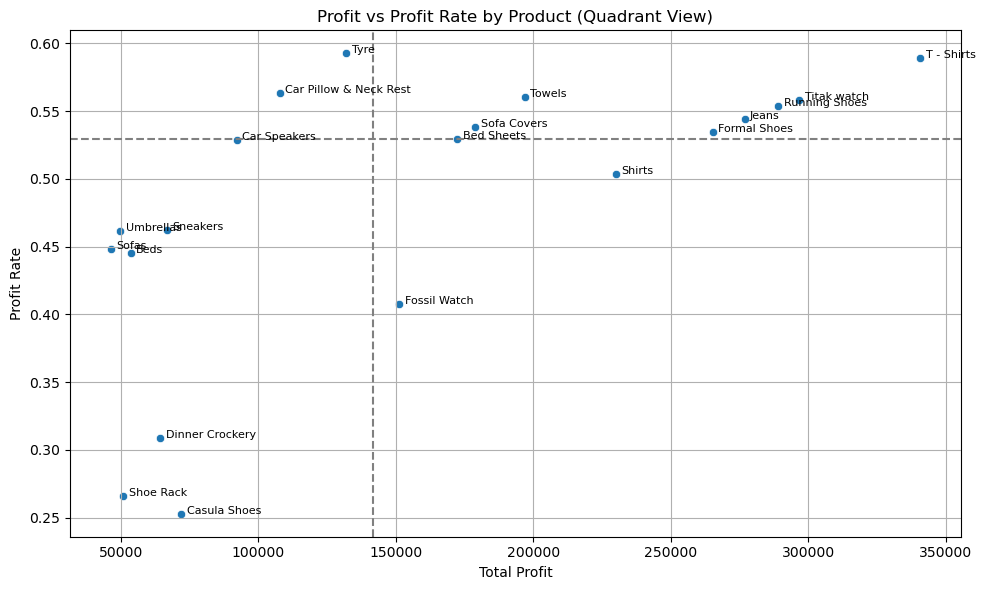

In [178]:


# Reuse previous summary table
summary = df.groupby('Product').agg({
    'Profit': 'sum',
    'Sales': 'sum'
})
summary['Profit_Rate'] = summary['Profit'] / summary['Sales']
summary = summary.sort_values(by='Profit', ascending=False).head(20)

# Calculate medians for quadrant split
median_profit = summary['Profit'].median()
median_rate = summary['Profit_Rate'].median()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=summary, x='Profit', y='Profit_Rate')

# Draw quadrant lines
plt.axvline(median_profit, color='gray', linestyle='--')
plt.axhline(median_rate, color='gray', linestyle='--')

# Add labels
for i in summary.index:
    ax.text(summary.loc[i, 'Profit'] + 2000,
            summary.loc[i, 'Profit_Rate'],
            s=i, fontsize=8)

# Titles and labels
plt.title("Profit vs Profit Rate by Product (Quadrant View)")
plt.xlabel("Total Profit")
plt.ylabel("Profit Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


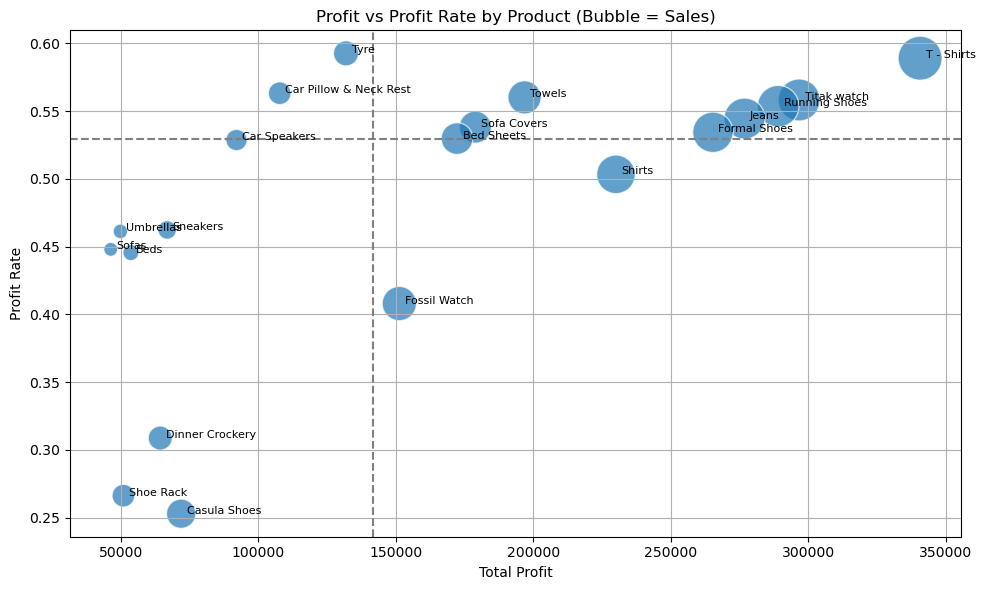

In [180]:
# Profit vs. Profit Rate vs. Sales（Bubble Chart）

# Group by Product, calculate Profit, Sales, and Profit Rate
summary = df.groupby('Product').agg({
    'Profit': 'sum',
    'Sales': 'sum'
})
summary['Profit_Rate'] = summary['Profit'] / summary['Sales']

# Select top 20 products by total profit
summary = summary.sort_values(by='Profit', ascending=False).head(20)

# Plot bubble chart
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=summary,
    x='Profit',
    y='Profit_Rate',
    size='Sales',              # Bubble size = total sales
    sizes=(100, 1000),         # Bubble size range
    legend=False,              # Turn off default size legend for clean view
    alpha=0.7
)

# Draw quadrant lines (median-based)
median_profit = summary['Profit'].median()
median_rate = summary['Profit_Rate'].median()
plt.axvline(median_profit, color='gray', linestyle='--')
plt.axhline(median_rate, color='gray', linestyle='--')

# Add product name as label
for i in summary.index:
    ax.text(summary.loc[i, 'Profit'] + 2000,
            summary.loc[i, 'Profit_Rate'],
            s=i, fontsize=8)

# Labels and layout
plt.title("Profit vs Profit Rate by Product (Bubble = Sales)")
plt.xlabel("Total Profit")
plt.ylabel("Profit Rate")
plt.tight_layout()
plt.grid(True)
plt.show()


### 5.2 By Customer Type (Profit Structure)
- Profit_Level breakdown by login type, gender, device, order priority, payment method

/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/1713317825.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Profit_Level', dim]).size().unstack(fill_value=0)
/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/1713317825.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Profit_Level', dim]).size().unstack(fill_value=0)
/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/1713317825.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

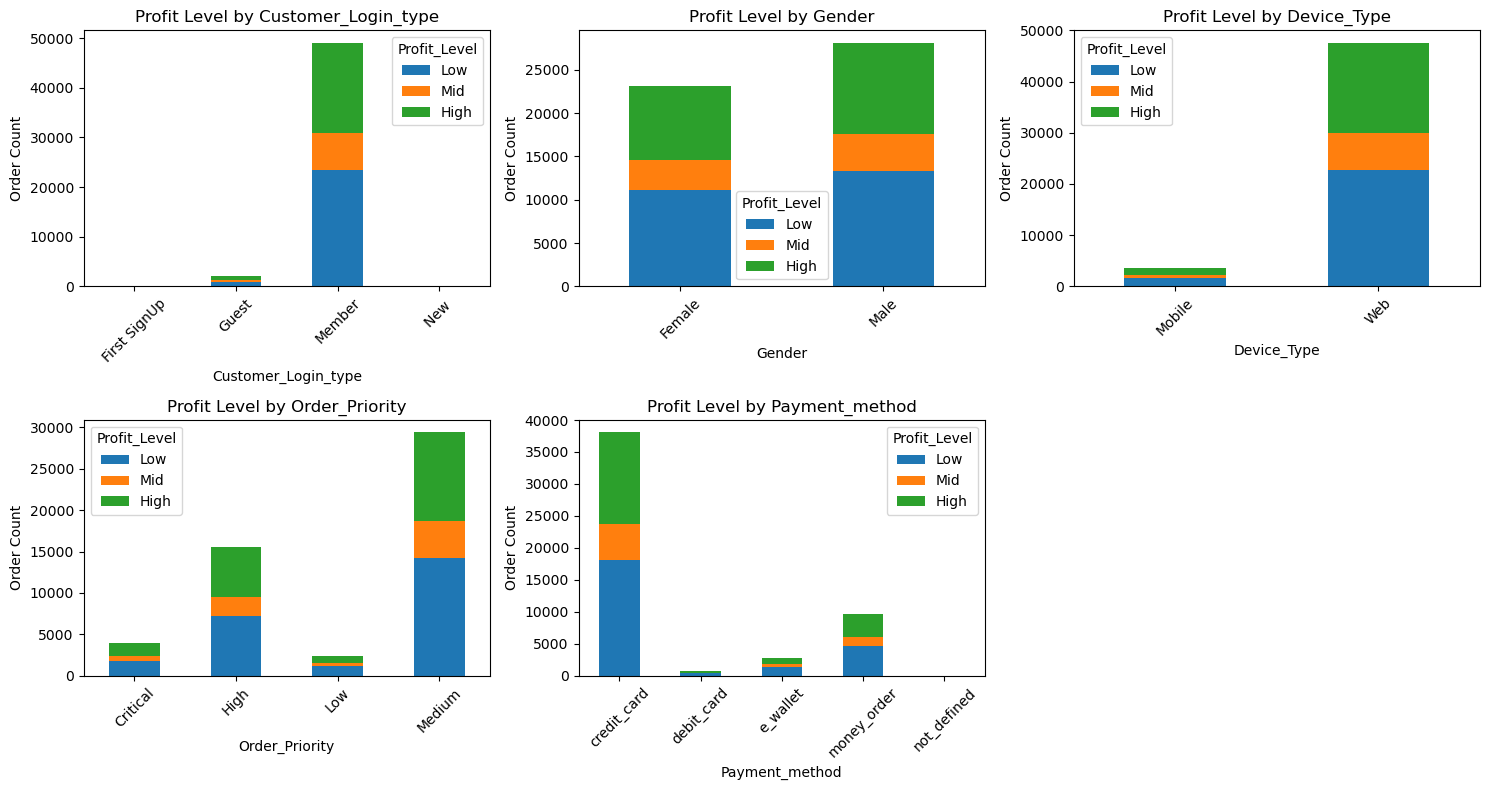

In [120]:
# Define dimensions to plot
dims = ['Customer_Login_type', 'Gender', 'Device_Type', 'Order_Priority', 'Payment_method']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Loop through each dimension
for i, dim in enumerate(dims):
    # Group data
    grouped = df.groupby(['Profit_Level', dim]).size().unstack(fill_value=0)
    
    # Plot stacked bar chart
    grouped.T.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Profit Level by {dim}')
    axes[i].set_xlabel(dim)
    axes[i].set_ylabel('Order Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplot if any
if len(dims) < len(axes):
    for j in range(len(dims), len(axes)):
        fig.delaxes(axes[j])

# Tight layout
plt.tight_layout()

/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/939350180.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['Profit'], ax=axes[0, i], palette='Blues_d')
/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/939350180.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['Profit_Rate'], ax=axes[1, i], palette='Greens_d')
/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/939350180.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.ind

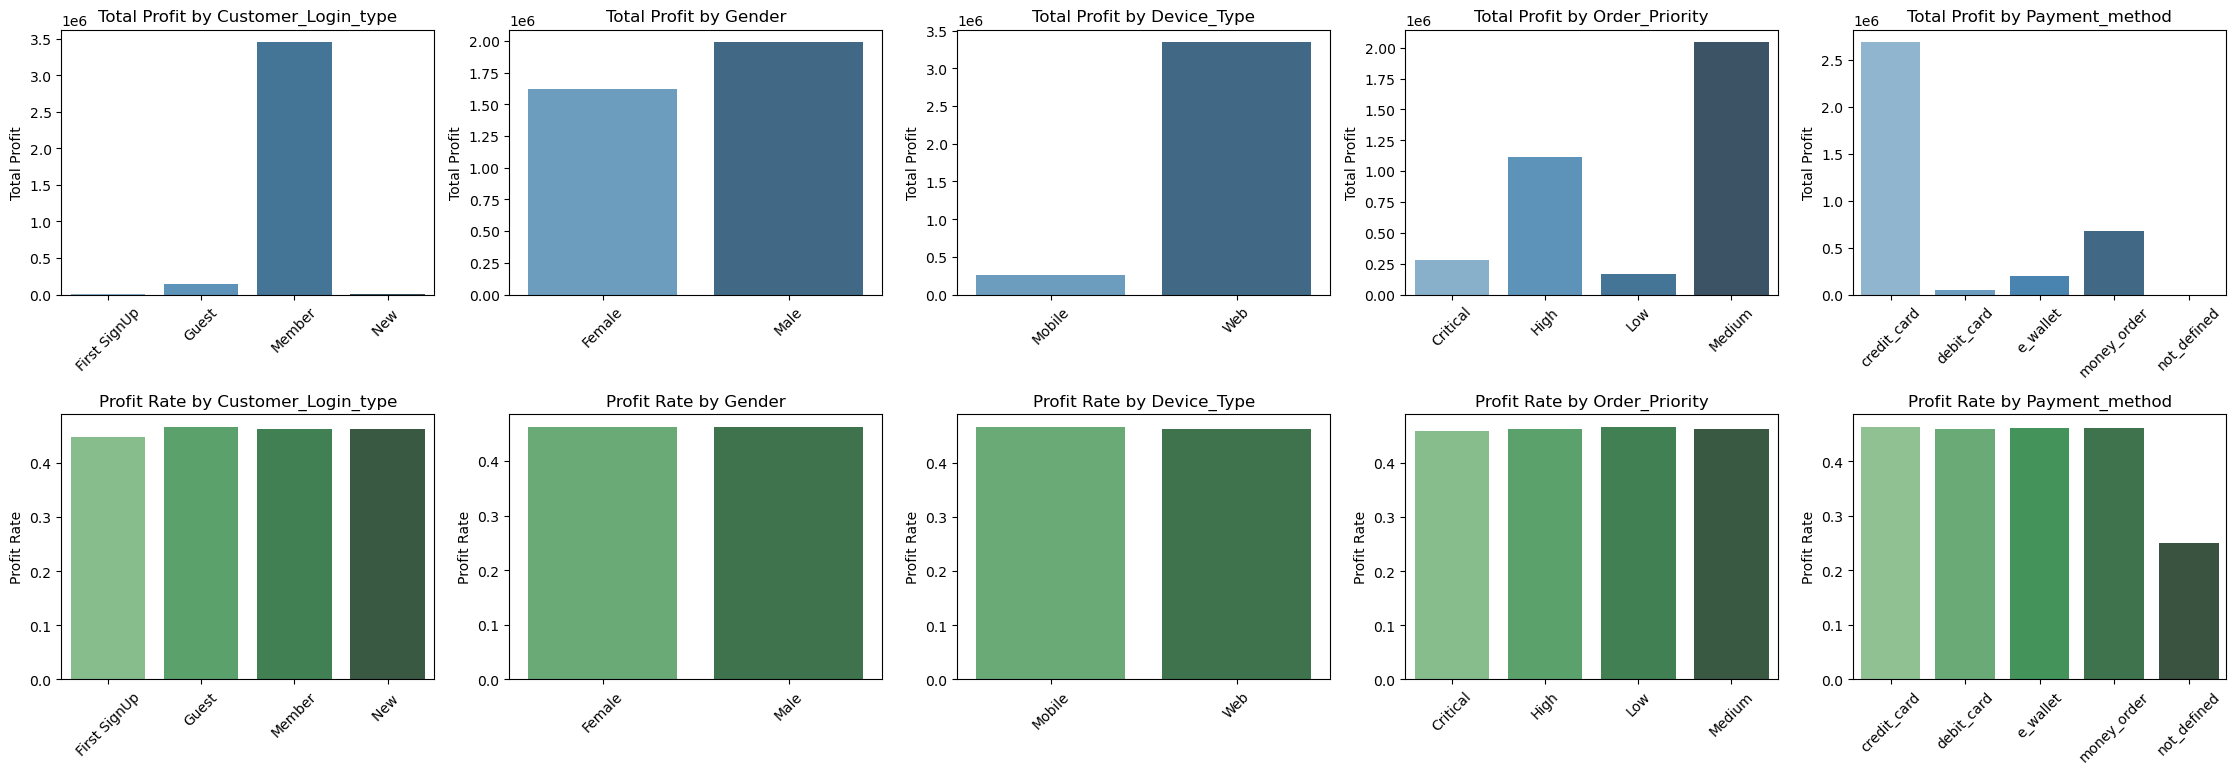

In [197]:

# Define customer-related categorical dimensions
dims = ['Customer_Login_type', 'Gender', 'Device_Type', 'Order_Priority', 'Payment_method']

# Create subplots: 2 rows x len(dims) columns
fig, axes = plt.subplots(2, len(dims), figsize=(4.5 * len(dims), 8))

# Loop through dimensions
for i, dim in enumerate(dims):
    # Group and calculate total profit and profit rate
    grouped = df.groupby(dim).agg({
        'Profit': 'sum',
        'Sales': 'sum'
    }).assign(Profit_Rate=lambda x: x['Profit'] / x['Sales'])

    # Bar plot for Total Profit
    sns.barplot(x=grouped.index, y=grouped['Profit'], ax=axes[0, i], palette='Blues_d')
    axes[0, i].set_title(f"Total Profit by {dim}")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("Total Profit")
    axes[0, i].tick_params(axis='x', rotation=45)

    # Bar plot for Profit Rate
    sns.barplot(x=grouped.index, y=grouped['Profit_Rate'], ax=axes[1, i], palette='Greens_d')
    axes[1, i].set_title(f"Profit Rate by {dim}")
    axes[1, i].set_xlabel("")
    axes[1, i].set_ylabel("Profit Rate")
    axes[1, i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


### 5.3 Cross: Customer × Product
- High-profit order ratio heatmap by customer type and product category

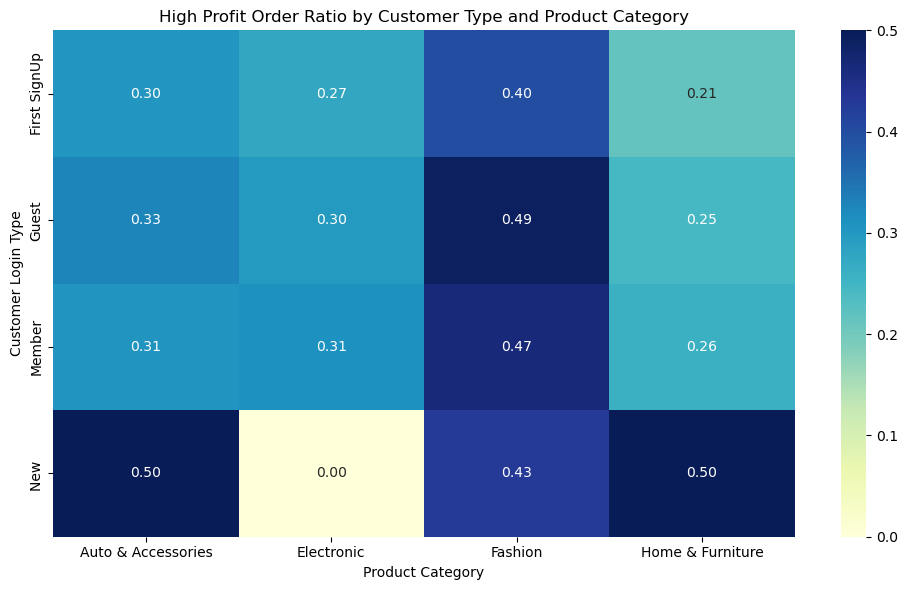

In [239]:
# Calculate the number of high-profit orders per customer type and product category
high_profit_ratio = df[df['Profit_Level'] == 'High'].groupby(['Customer_Login_type', 'Product_Category']).size()

# Calculate the total number of orders per customer type and product category
total_orders = df.groupby(['Customer_Login_type', 'Product_Category']).size()

# Compute the ratio of high-profit orders for each customer-product combination
ratio_table = (high_profit_ratio / total_orders).unstack().fillna(0)

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of high-profit order ratios
plt.figure(figsize=(10, 6))
sns.heatmap(ratio_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("High Profit Order Ratio by Customer Type and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Customer Login Type")
plt.tight_layout()
plt.show()


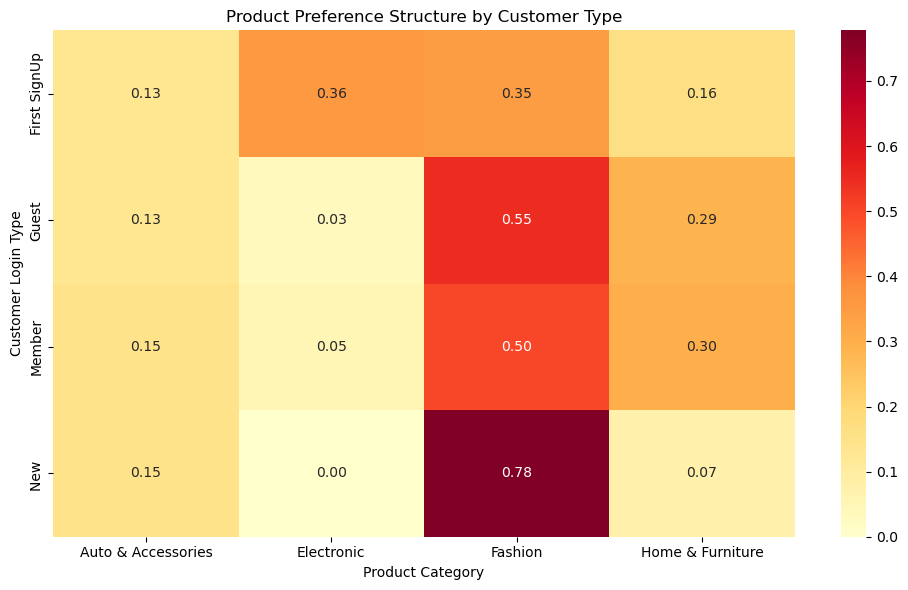

In [237]:
# Count total orders per customer type and product category
order_counts = df.groupby(['Customer_Login_type', 'Product_Category']).size().unstack().fillna(0)

# Normalize by row to see preference structure (row = customer type)
preference_ratio = order_counts.div(order_counts.sum(axis=1), axis=0)

# Optional: visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(preference_ratio, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title("Product Preference Structure by Customer Type")
plt.xlabel("Product Category")
plt.ylabel("Customer Login Type")
plt.tight_layout()
plt.show()


### 5.4 Time Trend Analysis (Supplementary analysis)
- Monthly total profit trend
- Monthly profit rate trend
- Profit structure stability over time

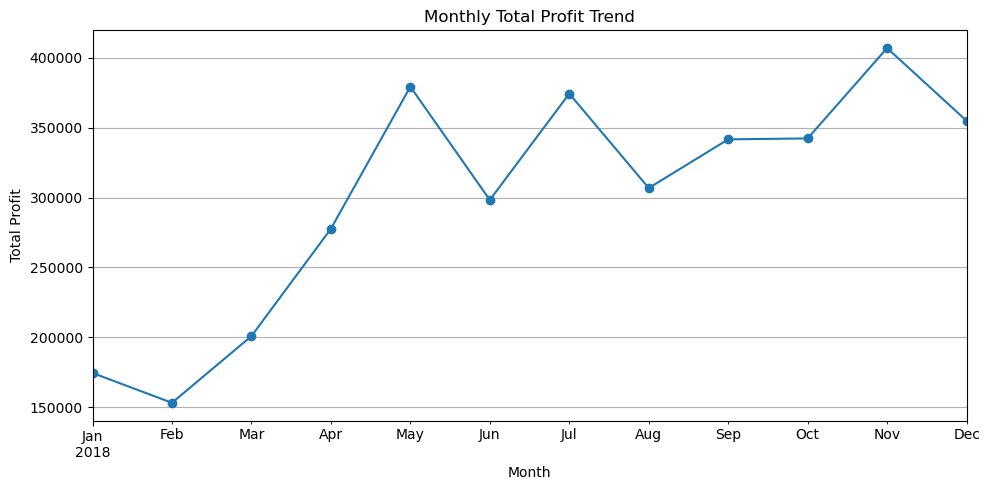

In [243]:
# Total Monthly Profit
# Group data by month and calculate total profit
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_profit = df.groupby('Month')['Profit'].sum()

# Plot monthly total profit trend
monthly_profit.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Total Profit Trend")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


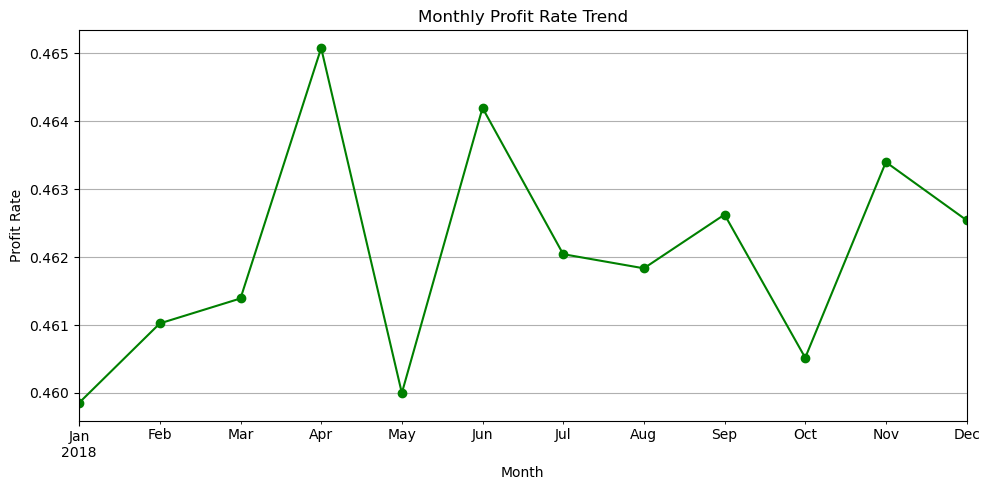

In [245]:

# Group by month and calculate total sales and profit
monthly = df.groupby('Month').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

# Calculate profit rate = profit / sales
monthly['Profit_Rate'] = monthly['Profit'] / monthly['Sales']

# Plot profit rate over time
monthly['Profit_Rate'].plot(kind='line', marker='o', color='green', figsize=(10, 5))
plt.title("Monthly Profit Rate Trend")
plt.xlabel("Month")
plt.ylabel("Profit Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/r0/mqc7d78j1dlfq0w4y_kc0fk40000gn/T/ipykernel_14848/1931552356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_level = df.groupby(['Month', 'Profit_Level']).size().unstack().fillna(0)


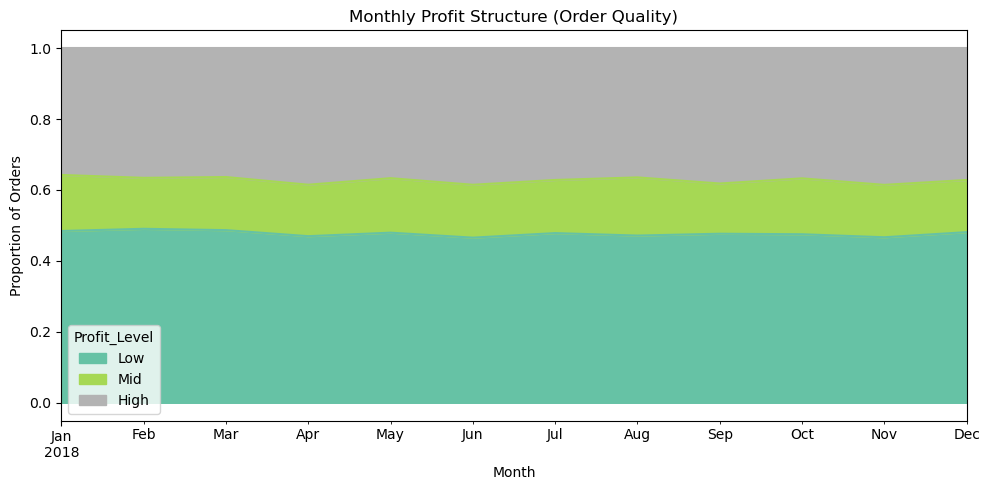

In [247]:

# Count orders by month and profit level
monthly_level = df.groupby(['Month', 'Profit_Level']).size().unstack().fillna(0)

# Convert counts to proportions (row-wise normalization)
monthly_level_ratio = monthly_level.div(monthly_level.sum(axis=1), axis=0)

# Plot profit level structure over time as area chart
monthly_level_ratio.plot(kind='area', stacked=True, figsize=(10, 5), colormap='Set2')
plt.title("Monthly Profit Structure (Order Quality)")
plt.xlabel("Month")
plt.ylabel("Proportion of Orders")
plt.tight_layout()
plt.show()
